In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../plots.mplstyle')

In [ ]:
df = pd.read_pickle('./catalog/20200314/andes/sv0/20200314_andes_sv0_b_spec.csv')
df

In [ ]:
df[df['TARGETID']==611646930002378807]

In [ ]:
plt.plot(np.array(pd.read_pickle('./catalog/20200314/andes/sv0/20200314_andes_sv0_b_wave.csv')), np.array(df['FLUX'][df['TARGETID']==35191270368348426])[0])

In [ ]:
plt.plot(np.array(pd.read_pickle('./catalog/20200314/andes/sv0/20200314_andes_sv0_b_wave.csv')), np.array(df['FLUX'][df['TARGETID']==35191270368348426])[1])

In [ ]:
plt.plot(np.array(pd.read_pickle('./catalog/20200314/andes/sv0/20200314_andes_sv0_b_wave.csv')), np.array(df['FLUX'][df['TARGETID']==611646930002378807])[2])

In [ ]:
Nn = np.array([5,25,45])
Md = np.array([0.0,0.5,1])
metric = np.array(['euclidean','braycurtis','cosine'])

for nn in Nn:
    for md in Md:
        for me in metric:
            df_umap = pd.read_pickle(f'./paper_data/20200314/andes/sv0/20200314_andes_sv0_b_spec_nn{nn}_md{md}_{me}.csv')
            weirds = [611646930002378807, 611646930006574018, 35190944424790504, 35190949411817627, 35190954377871803, 35185766799769607, 35185766803968039, 35191181935645212, 35191186020896571, 35185766116098370, 35185766120297470, 35185772160092167, 35191266723497398, 35191270368346796, 35191270368348426]
            for we in weirds:
                fig = plt.figure(figsize=(7,7))
                label = f'nn{nn}_md{md}_{me}__{we}'
                print(label)
                plt.title(f'{label} {we}')
                plt.plot(df_umap['X_UMAP'], df_umap['Y_UMAP'],'o')
                plt.plot(np.array(df_umap['X_UMAP'])[df['TARGETID']==we], np.array(df_umap['Y_UMAP'])[df['TARGETID']==we], 'o', c='black')
                plt.show()
            
            print('\n\n\n')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_pickle('umap_stats_nn15_md0.5_cosine_ll0.2_mm5.csv')
df

In [ ]:
np.unique(df['RELEASE'][df['SURVEY'] == 'sv3'])

In [ ]:
import fitsio

fitsio.__version__

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_pickle('umap_stats.csv')
np.array(df['FILE'])[0],np.array(df['FILE'])[-1]

In [ ]:
df

In [14]:
from glob import glob
import numpy as np

In [22]:
for r in ['cmx','sv1','sv3','main','special']:
    files = np.sort(glob(f'./catalog/*/iron/{r}/*_brz_wave*.csv'))
    print(r, len(files))

cmx 1
sv1 35
sv3 38
main 0
special 3


In [23]:
files

array(['./catalog/20210512/iron/special/20210512_iron_special_brz_wave.csv',
       './catalog/20210513/iron/special/20210513_iron_special_brz_wave.csv',
       './catalog/20210529/iron/special/20210529_iron_special_brz_wave.csv'],
      dtype='<U66')

In [1]:
import pylab as pl
import pandas as pd
import numpy as np

In [2]:
pernight = pd.read_pickle('catalog/20210707/guadalupe/main/20210707_guadalupe_main_b_spec.csv')
cumulati = pd.read_pickle('catalogcum/20210707/guadalupe/main/20210707_guadalupe_main_b_spec.csv')

In [3]:
pernight.drop(['FLUX'], axis=1).compare(cumulati.drop(['FLUX'], axis=1))

Empty DataFrame
Columns: []
Index: []

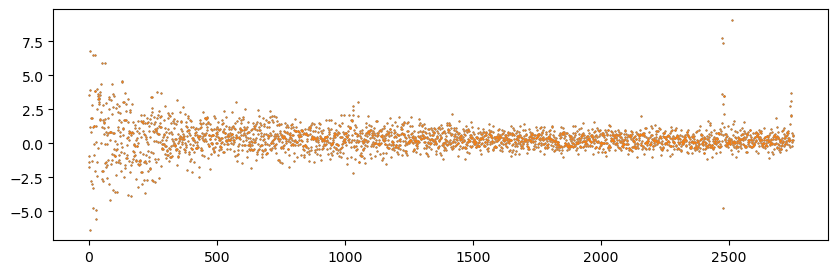

In [4]:
pl.figure(figsize=(10,3))
pl.plot(pernight['FLUX'][1], '.', markersize=1)
pl.plot(cumulati['FLUX'][1], '.', markersize=1)
pl.show()

In [40]:
denali2021    = pd.read_pickle('catalog/20210102/denali/sv1/20210102_denali_sv1_b_spec.csv')
everest2021 = pd.read_pickle('catalog/20210102/everest/sv1/20210102_everest_sv1_b_spec.csv')
fuji2021 = pd.read_pickle('catalog/20210102/fuji/sv1/20210102_fuji_sv1_b_spec.csv')
iron2021    = pd.read_pickle('catalog/20210102/iron/sv1/20210102_iron_sv1_b_spec.csv')

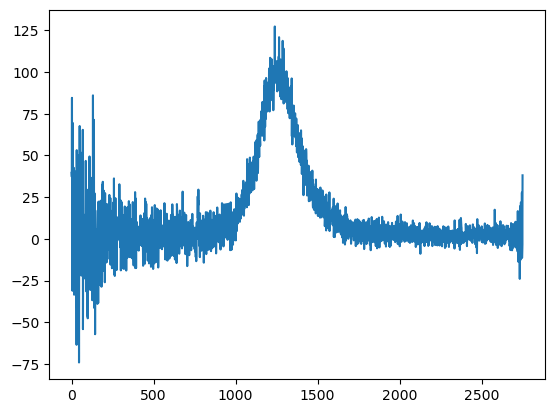

In [41]:
pl.plot(np.array(denali2021['FLUX'][denali2021['TARGETID']==39627628537186687])[1])

In [42]:
pl.plot(np.array(everest2021['FLUX'][everest2021['TARGETID']==39627628537186687])[1])

In [44]:
pl.plot(np.array(fuji2021['FLUX'][fuji2021['TARGETID']==39627628537186687])[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [45]:
pl.plot(np.array(iron2021['FLUX'][iron2021['TARGETID']==39627628537186687])[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [32]:
import pylab as pl
import pandas as pd
import numpy as np

from dadapy import Data
from dadapy.plot import plot_SLAn, plot_MDS, plot_matrix, get_dendrogram, plot_DecGraph

from pyfof import friends_of_friends

In [66]:
def den_fof(data, ll, nm):
    pl.scatter(data['X_UMAP'],data['Y_UMAP'], s=0.2)
    pl.show()
    
    data_np = np.array(data)
    den_data = Data(data_np, verbose=True)
    den_data.compute_density_kstarNN()    
    density = den_data.log_den

    pl.scatter(data_np[:,0], data_np[:,1],s=15., alpha=0.9, c=den_data.log_den, linewidths=0.0)
    pl.colorbar()
    pl.show()
    
    ## FOF algorithm to find the islands
    friends = friends_of_friends(data_np.astype(float), ll)

    # Apply a filter on the FOF:    friends>number_friends &  friends<data/# to remove big clusters
    friends_min = []
    spec_friends = []
    z_friends = []
    n_members = []  
    for f in friends:
        if (len(f)>=nm) & (len(f)<len(data)*0.2) & (np.average(density[f])<-6.5):
            friends_min.append(f)
            n_members.append(len(f))
            
        if len(n_members)!=0:
            mean = np.mean(n_members)
            std = np.std(n_members)
        else:
            mean = 0
            std = 0

    friends_min = np.array(friends_min, dtype='object')
    n_members   = np.array(n_members)
    
    print('{} islands for ll {} with more than {} members!'.format(len(friends_min), ll, nm))
    print('total outliers identified {}'.format(sum(n_members)))
    
    for f in friends_min:
        f = np.array(f, dtype=int)
        pl.scatter(data_np[f][:,0], data_np[f][:,1], s=5, c='black')
    pl.scatter(data_np[:,0], data_np[:,1], s=1., alpha=0.9, linewidths=0.0)
    pl.show()

In [67]:
def fof(data, ll, nm):
    pl.scatter(data['X_UMAP'],data['Y_UMAP'], s=0.2)
    pl.show()
    
    data_np = np.array(data)

    friends = friends_of_friends(data_np.astype(float), ll)

    # Apply a filter on the FOF:    friends>number_friends &  friends<data/# to remove big clusters
    friends_min = []
    spec_friends = []
    z_friends = []
    n_members = []
    for f in friends:
        if (len(f)>=nm) & (len(f)<len(data)*0.2):
            friends_min.append(f)
            n_members.append(len(f))

            if len(n_members)!=0:
                mean = np.mean(n_members)
                std = np.std(n_members)
            else:
                mean = 0
                std = 0

    friends_min = np.array(friends_min, dtype='object')
    n_members   = np.array(n_members)
    
    print('{} islands for ll {} with more than {} members!'.format(len(friends_min), ll, nm))
    print('total outliers identified {}'.format(sum(n_members)))

    for f in friends_min:
        f = np.array(f, dtype=int)
        pl.scatter(data_np[f][:,0], data_np[f][:,1], s=5, c='black')
    pl.scatter(data_np[:,0], data_np[:,1], s=1., alpha=0.9, linewidths=0.0)
    pl.show()

Computation of distances started
Computation of the distances up to 100 NNs started
0.36 seconds for computing distances
ID estimation finished: selecting ID of 2.001360709402953
kstar estimation started, Dthr = 23.92812698
0.19 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished


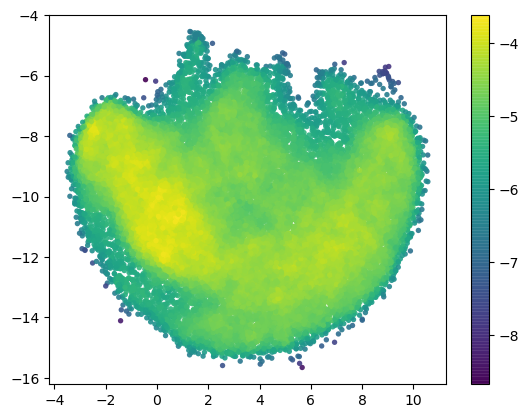

1 islands for ll 0.15 with more than 5 members!
total outliers identified 20


In [68]:
data = pd.read_pickle('./finalreduced/20210709/iron/main/20210709_iron_main_b_spec_nn45_md1.0_cosine.csv')
den_fof(data, 0.15, 5)

3 islands for ll 0.15 with more than 5 members!
total outliers identified 31


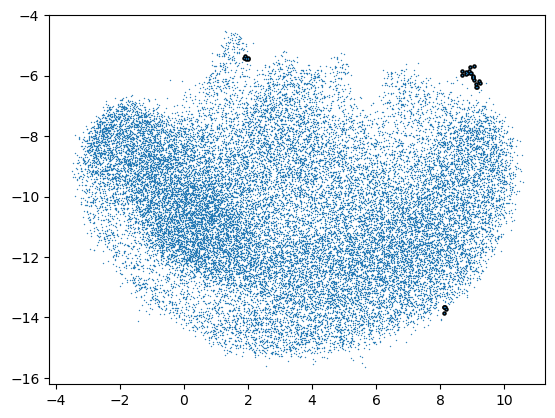

In [69]:
fof(data, 0.15, 5)

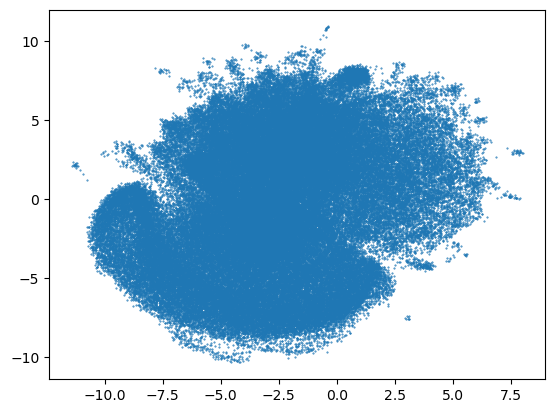

Computation of distances started
Computation of the distances up to 100 NNs started
1.63 seconds for computing distances
ID estimation finished: selecting ID of 1.9924949745501408
kstar estimation started, Dthr = 23.92812698
1.18 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished


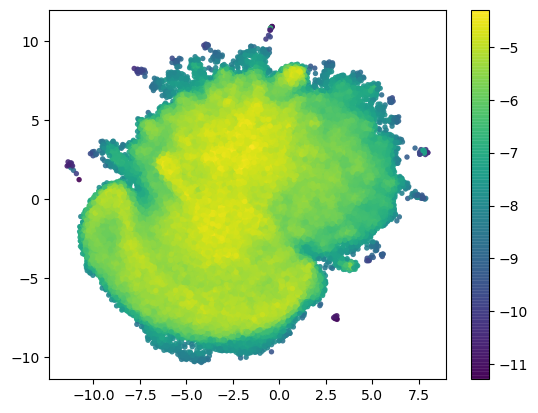

22 islands for ll 0.15 with more than 5 members!
total outliers identified 582


In [70]:
data = pd.read_pickle('./finalreduced/20200314/andes/sv0/20200314_andes_sv0_b_spec_nn45_md1.0_cosine.csv')
den_fof(data, 0.15, 5)

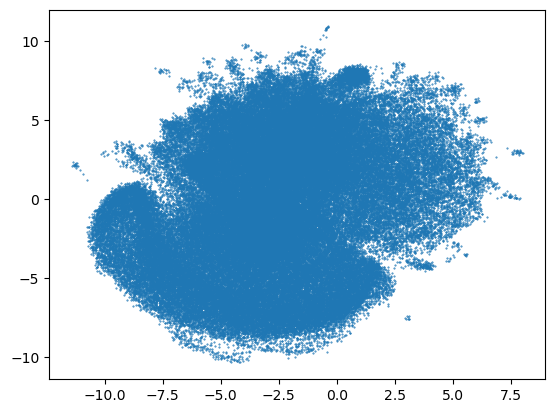

22 islands for ll 0.15 with more than 5 members!
total outliers identified 582


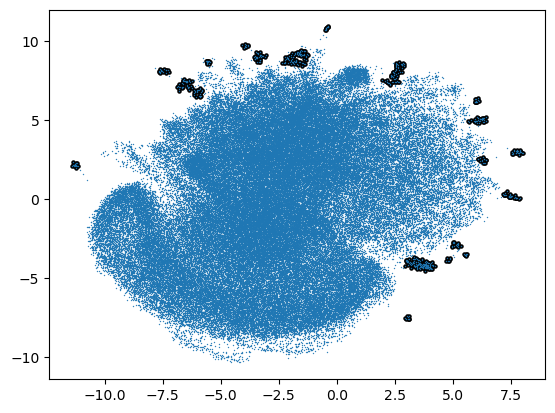

In [71]:
fof(data, 0.15, 5)

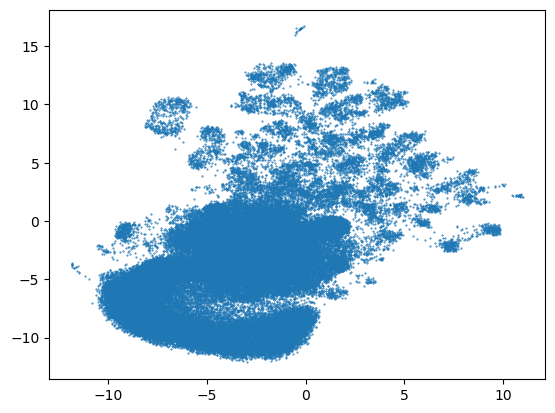

Computation of distances started
Computation of the distances up to 100 NNs started
1.02 seconds for computing distances
ID estimation finished: selecting ID of 2.0022675738822007
kstar estimation started, Dthr = 23.92812698
0.64 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished


73 islands for ll 0.15 with more than 5 members!
total outliers identified 4144


In [72]:
data = pd.read_pickle('./finalreduced/20200314/blanc/sv0/20200314_blanc_sv0_b_spec_nn45_md1.0_cosine.csv')
den_fof(data, 0.15, 5)

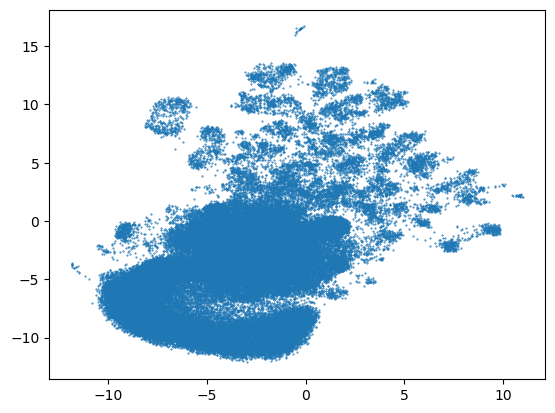

81 islands for ll 0.15 with more than 5 members!
total outliers identified 6117


In [73]:
fof(data, 0.15, 5)

Computation of distances started
Computation of the distances up to 100 NNs started
0.05 seconds for computing distances
ID estimation finished: selecting ID of 2.045161025726401
kstar estimation started, Dthr = 23.92812698
0.03 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished


0 islands for ll 0.15 with more than 5 members!
total outliers identified 0


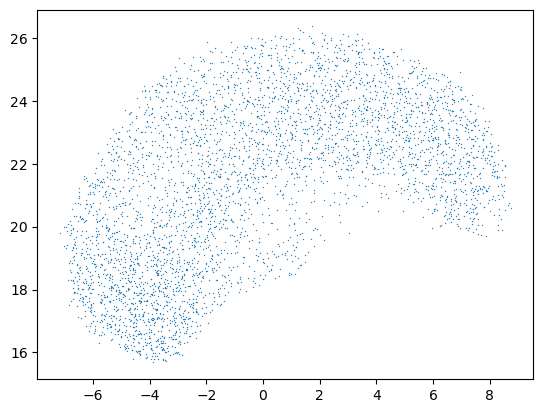

In [74]:
data = pd.read_pickle('./finalreduced/20220201/iron/main/20220201_iron_main_b_spec_nn45_md1.0_cosine.csv')
den_fof(data, 0.15, 5)

In [26]:
import pylab as pl

In [28]:
pl.scatter(data['X_UMAP'],data['Y_UMAP'], c=den_data.log_den)

NameError: name 'den_data' is not defined

In [ ]:
import os
import numpy as np
from   glob import glob
from   astropy.table import Table
import pandas as pd
import desispec.io
import psutil
import time
import pylab as plt

from tqdm import tqdm

import umap
from dadapy import Data
from dadapy.plot import plot_SLAn, plot_MDS, plot_matrix, get_dendrogram, plot_DecGraph
from pyfof import friends_of_friends as fof

plt.style.use('./tools/outliers.mplstyle')

class find_outliers():
    def __init__(self, data_params, umap_params, fof_params):
        self.release = data_params[0]
        self.survey  = data_params[1]
        self.night   = data_params[2]
        self.outpath = data_params[3]
        
        self.nn      = umap_params[0]
        self.md      = umap_params[1]
        self.me      = umap_params[2]
        
        self.ll      = fof_params[0]
        self.nm      = fof_params[1]
        
        self.outpath = f'{self.outpath}/{self.night}/{self.release}/{self.survey}'
        
        self.spec_file_b =   f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_b_spectra.csv'
        self.spec_file_r =   f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_r_spectra.csv'
        self.spec_file_z =   f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_z_spectra.csv'
        self.spec_file_brz = f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_brz_spectra.csv'
        
        self.wave_file_b =   f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_b_wave.csv'
        self.wave_file_r =   f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_r_wave.csv'
        self.wave_file_z =   f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_z_wave.csv'
        self.wave_file_brz = f'{self.outpath}/spectra/{self.night}_{self.release}_{self.survey}_brz_wave.csv'
        
        self.umap_file_b =   f'{self.outpath}/umap/{self.night}_{self.release}_{self.survey}_b_spectra_nn{self.nn}_md{self.md}_{self.me}.csv'
        self.umap_file_r =   f'{self.outpath}/umap/{self.night}_{self.release}_{self.survey}_r_spectra_nn{self.nn}_md{self.md}_{self.me}.csv'
        self.umap_file_z =   f'{self.outpath}/umap/{self.night}_{self.release}_{self.survey}_z_spectra_nn{self.nn}_md{self.md}_{self.me}.csv'
        self.umap_file_brz = f'{self.outpath}/umap/{self.night}_{self.release}_{self.survey}_brz_spectra_nn{self.nn}_md{self.md}_{self.me}.csv'
        
    def create_dataset(self, release, survey, night, globoutpath):
        new_releases = ['denali','everest','fuji','guadalupe','iron']
        notrr_releases = ['andes','blanc','cascades','denali']
        
        tiles_path   = f'/global/cfs/cdirs/desi/spectro/redux/{release}/tiles'
        release_path = f'/global/cfs/cdirs/desi/spectro/redux/{release}'
        
        if release in new_releases:
            path = f'{tiles_path}/cumulative/'
            
        exposures_file = f'{release_path}/exposures-{release}.csv'
        
        data = pd.read_csv(exposures_file)

        if 'FAPRGRM' in data.keys():
            data_tmp = data[data['FAPRGRM']!='backup']
        else:
            data_tmp = data.copy()

        data_tmp = data_tmp[data_tmp['SURVEY']==survey]
        tiles    = np.unique(data_tmp['TILEID'][data_tmp['NIGHT']==night])

        outpath = f'./{globoutpath}/spectra/'

        #################DANGER-> Just To_Test
        #tiles = tiles[0:1]
        #################DANGER

        if len(tiles)>0:
            os.makedirs(outpath, exist_ok=True)
        else:
            print('Not tiles found!')
            return 0

        scolumns = ['TARGETID','TILEID','PETAL_LOC','EXPID','FIBER','MJD','TARGET_RA','TARGET_DEC','FIBERSTATUS',
                    'FLUX_B','FLUX_R','FLUX_Z','FLUX_BRZ','SUMFLUX_B','SUMFLUX_R','SUMFLUX_Z','SUMFLUX_BRZ']
        zcolumns = ['TARGETID','Z','ZERR','ZWARN','SPECTYPE','CHI2','DELTACHI2']

        df_spec     = pd.DataFrame()
        df_wave_b   = pd.DataFrame()
        df_wave_r   = pd.DataFrame()
        df_wave_z   = pd.DataFrame()
        df_wave_brz = pd.DataFrame()

        if (not(os.path.isfile(self.spec_file_b)) or not(os.path.isfile(self.wave_file_b)) or 
            not(os.path.isfile(self.spec_file_r)) or not(os.path.isfile(self.wave_file_r)) or
            not(os.path.isfile(self.spec_file_z)) or not(os.path.isfile(self.wave_file_z)) or 
            not(os.path.isfile(self.spec_file_brz)) or not(os.path.isfile(self.wave_file_brz)) ):

            for tile in tiles:

                #print(f'Finding files on {path}/{tile}/{night}/')
                sfiles = np.sort(glob(f'{path}/{tile}/{night}/spectra*.fits*'))

                for sfile in sfiles:

                    #try:
                    sp    = desispec.io.read_spectra(sfile)
                    sp_pd = sp.fibermap.to_pandas()

                    sp_pd['FLUX_B'] = [i for i in sp.flux['b']]
                    sp_pd['FLUX_R'] = [i for i in sp.flux['r']]
                    sp_pd['FLUX_Z'] = [i for i in sp.flux['z']]
                    sp_pd['FLUX_BRZ'] = [np.concatenate([x,y,z])  for x,y,z in zip(sp.flux['b'],sp.flux['r'],sp.flux['z'])]

                    sum_flux_b = [sum(i) for i in sp_pd['FLUX_B']]
                    sum_flux_r = [sum(i) for i in sp_pd['FLUX_R']]
                    sum_flux_z = [sum(i) for i in sp_pd['FLUX_Z']]
                    sum_flux_brz = [sum(i) for i in sp_pd['FLUX_BRZ']]

                    sp_pd['SUMFLUX_B'] = sum_flux_b
                    sp_pd['SUMFLUX_R'] = sum_flux_r
                    sp_pd['SUMFLUX_Z'] = sum_flux_z
                    sp_pd['SUMFLUX_BRZ'] = sum_flux_brz

                    if release in notrr_releases:
                        zfile = sfile.replace('spectra', 'zbest')
                    else:
                        zfile = sfile.replace('spectra', 'redrock')
                        zfile = zfile.replace('.gz', '')

                    zs = Table.read(zfile, hdu=1)

                    s_temp = sp_pd[scolumns]
                    z_temp = zs[zcolumns].to_pandas()

                    df_spec = pd.concat([df_spec, pd.merge(s_temp, z_temp)], ignore_index=True)

                    #except:
                      #  print(f'Error reading {sfile}')

            if len(df_spec) > 0:
                df_spec = df_spec[~df_spec.astype(str).duplicated()]

                df_spec = df_spec[df_spec['FIBERSTATUS'] == 0]
                df_spec = df_spec.drop(['FIBERSTATUS'], axis=1)

                df_spec_b = df_spec[df_spec['SUMFLUX_B'] != 0]
                df_spec_b = df_spec_b.drop(['SUMFLUX_R','SUMFLUX_Z','SUMFLUX_BRZ','FLUX_R','FLUX_Z','FLUX_BRZ'], axis=1)
                df_spec_b = df_spec_b.rename(columns = {'FLUX_B':'FLUX'})
                df_spec_b.to_pickle(self.spec_file_b)
                del df_spec_b

                df_spec_r = df_spec[df_spec['SUMFLUX_R'] != 0]
                df_spec_r = df_spec_r.drop(['SUMFLUX_B','SUMFLUX_Z','SUMFLUX_BRZ','FLUX_B','FLUX_Z','FLUX_BRZ'], axis=1)
                df_spec_r = df_spec_r.rename(columns = {'FLUX_R':'FLUX'})
                df_spec_r.to_pickle(self.spec_file_r)
                del df_spec_r

                df_spec_z = df_spec[df_spec['SUMFLUX_Z'] != 0]
                df_spec_z = df_spec_z.drop(['SUMFLUX_B','SUMFLUX_R','SUMFLUX_BRZ','FLUX_B','FLUX_R','FLUX_BRZ'], axis=1)
                df_spec_z = df_spec_z.rename(columns = {'FLUX_Z':'FLUX'})
                df_spec_z.to_pickle(self.spec_file_z)
                del df_spec_z

                df_spec_brz = df_spec[df_spec['SUMFLUX_BRZ'] != 0]
                df_spec_brz = df_spec_brz.drop(['SUMFLUX_B','SUMFLUX_R','SUMFLUX_Z','FLUX_B','FLUX_R','FLUX_Z'], axis=1)
                df_spec_brz = df_spec_brz.rename(columns = {'FLUX_BRZ':'FLUX'})
                df_spec_brz.to_pickle(self.spec_file_brz)
                del df_spec_brz

                try:
                    df_wave_b['WAVE'] = sp.wave['b']
                    df_wave_r['WAVE'] = sp.wave['r']
                    df_wave_z['WAVE'] = sp.wave['z']
                    df_wave_brz['WAVE'] = np.concatenate([sp.wave['b'], sp.wave['r'], sp.wave['z']])
                except:
                    print('Wave error')
                    None

                df_wave_b.to_pickle(self.wave_file_b)
                df_wave_r.to_pickle(self.wave_file_r)
                df_wave_z.to_pickle(self.wave_file_z)
                df_wave_brz.to_pickle(self.wave_file_brz)

                del sp, sp_pd, zs, s_temp, z_temp, df_spec, df_wave_b, df_wave_r, df_wave_z, df_wave_brz
        else:
            print('Data set already exist!')


    def compute_umap(self, inpath, file, nn, md, me, reducer): 
        night    = file.split('/')[2]
        release  = file.split('/')[3]
        survey   = file.split('/')[4]
        label    = file.split('/')[-1][:-4]
        band     = label.split('_')[-2]
               
        # try:
        umapfile = f'{inpath}/umap/{label}_nn{nn}_md{md}_{me}.csv'
        figfile  = f'{inpath}/umap/{label}_nn{nn}_md{md}_{me}.png'
        
        if ((os.path.isfile(umapfile) == False) or (os.path.isfile(figfile) == False)):
            to = time.time()
            FLUX = list(pd.read_pickle(file)['FLUX'])
            #print(f'Time used reading flux={time.time()-to}')
            size = len(FLUX)

            # print('Computing Embedding\n')
            to = time.time()
            reducer.fit(FLUX)
            #print(f'Time fitting={time.time()-to}')

            to = time.time()
            embedding  = reducer.transform(FLUX)
            #print(f'Time embedding={time.time()-to}')

            memory     = psutil.Process().memory_info().rss / (1024 * 1024) /1000.0
            del reducer, FLUX      
            
            to = time.time()
            df_UMAP = pd.DataFrame()
            df_UMAP['X_UMAP'] = embedding[:,0]
            df_UMAP['Y_UMAP'] = embedding[:,1] 
            df_UMAP.to_pickle(umapfile)
            
            del df_UMAP

            SPECTYPE = np.array(pd.read_pickle(file)['SPECTYPE'], dtype='U13')
            classes = np.sort(np.unique(SPECTYPE))
            SPECTYPE[SPECTYPE == 'GALAXY'] = 0  # GALAXY=0  -   QSO=1    -  STAR=2
            SPECTYPE[SPECTYPE == 'QSO'] = 1
            SPECTYPE[SPECTYPE == 'STAR'] = 2
            SPECTYPE = np.array(SPECTYPE, dtype=int)

            colors = np.zeros(len(SPECTYPE)).astype(str)
            colors[SPECTYPE==0] = "#75bbfd"
            colors[SPECTYPE==1] = "#c20078"
            colors[SPECTYPE==2] = "#96f97b"

            fig = plt.figure(figsize=(20,6))
            xmin = min(embedding[:,0])-1
            xmax = max(embedding[:,0])+1
            ymin = min(embedding[:,1])-1
            ymax = max(embedding[:,1])+1

            size = 2.5

            plt.subplot(141)
            plt.title("All",size=20)
            plt.scatter(embedding[:,0], embedding[:,1], c=colors, cmap='Paired', s=size)
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.grid(alpha=0.5)

            plt.subplot(142)
            plt.title("Galaxy",size=20)
            plt.scatter(embedding[:,0][SPECTYPE==0], embedding[:,1][SPECTYPE==0], color="#75bbfd", cmap='Paired', s=size)
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)  
            plt.xlabel('X')                         
            plt.grid(alpha=0.5)

            plt.subplot(143)
            plt.title("QSO",size=20)
            plt.scatter(embedding[:,0][SPECTYPE==1], embedding[:,1][SPECTYPE==1], color="#c20078", cmap='Paired', s=size)
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax) 
            plt.xlabel('X')                           
            plt.grid(alpha=0.5)

            plt.subplot(144)
            plt.title("Star",size=20)
            plt.scatter(embedding[:,0][SPECTYPE==2], embedding[:,1][SPECTYPE==2], color="#96f97b" , cmap='Paired', s=size)
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)
            plt.xlabel('X')                        
            plt.grid(alpha=0.5)

            fig.suptitle(r'$N_n$='+str(nn)+r', $M_d$='+str(round(md,2))+r', $M_e$='+str(me.title())+ ", Band:"+band.upper(), size=25, y=1)
            plt.tight_layout()

            plt.savefig(f'{figfile}', bbox_inches='tight')
            #plt.savefig(f'{figfile}.pdf', bbox_inches='tight', dpi=450)
            plt.close()

            del fig, SPECTYPE, colors, embedding, xmin, xmax, ymin, ymax
            # except:
            #     None
            #print(f'Time plotting={time.time()-to}')

            return memory, size 
        
        else:
            print('Reduction already exist!')
            return 0, 0

    def ifof(self, inpath, obs_params, reduc_params, fof_params, plot=False, save=False, all_island=False, log=True):
        night, release, survey, band = obs_params[0], obs_params[1], obs_params[2], obs_params[3]
        nn, md, me = reduc_params[0], reduc_params[1], reduc_params[2]
        ll, mm = fof_params[0], fof_params[1]
        
        imagefile = f'{night}_{release}_{survey}_{band}_nn{nn}_md{md}_{me}_ll{ll}_mm{mm}'
        imagepath = f'./{inpath}/outliers_den'
        
        os.makedirs(imagepath, exist_ok=True)
        
        df_umap = pd.read_pickle(f'./{inpath}/umap/{night}_{release}_{survey}_{band}_spectra_nn{nn}_md{md}_{me}.csv')
        df_spec = pd.read_pickle(f'./{inpath}/spectra/{night}_{release}_{survey}_{band}_spectra.csv')
        df_wave = pd.read_pickle(f'./{inpath}/spectra/{night}_{release}_{survey}_{band}_wave.csv')

        XUMAP = np.array(df_umap['X_UMAP'])
        YUMAP = np.array(df_umap['Y_UMAP'])
        data = np.array([XUMAP,YUMAP], dtype=float).T

        aobs = 1.0
        afit = 0.5

        Z = np.array(df_spec['Z'])

        SPECTYPE = np.array(df_spec['SPECTYPE'], dtype='U13')
        classes = np.sort(np.unique(SPECTYPE))
        SPECTYPE[SPECTYPE == 'GALAXY'] = 0  # GALAXY=0  -   QSO=1    -  STAR=2
        SPECTYPE[SPECTYPE == 'QSO'] = 1
        SPECTYPE[SPECTYPE == 'STAR'] = 2
        SPECTYPE = np.array(SPECTYPE, dtype=int)

        colors = np.zeros(len(SPECTYPE)).astype(str)
        colors[SPECTYPE==0] = "#75bbfd"
        colors[SPECTYPE==1] = "#c20078"
        colors[SPECTYPE==2] = "#96f97b"

        FLUX = np.array(df_spec['FLUX'])
        size = len(FLUX)
        len_flux = len(FLUX[0])

        WAVE = np.array(df_wave['WAVE'])
        
        #-------Compute density
        data_den = Data(data, verbose=False)
        data_den.compute_distances(maxk = 1000)
        data_den.compute_id_2NN()
        data_den.compute_density_kstarNN()
        density = data_den.log_den

        ## FOF algorithm to find the islands
        ix_data = np.arange(len(data))
        friends = fof(data[ii_den], ll)

        # Apply a filter on the FOF:    friends>number_friends &  friends<data/# to remove big clusters
        friends_min = []
        spec_friends = []
        z_friends = []
        n_members = []
        
         for ix in friends:
            if (len(kk)>=mm & (len(ix)<len(data)*0.2) & (len(ix)==sum(density[ix]<-7))):
                friends_min.append(ix)
                spec_friends.append(SPECTYPE[ix])
                z_friends.append(Z[ix])
                n_members.append(len(ix))
                
        if len(n_members)!=0:
            mean = np.mean(n_members)
            std = np.std(n_members)
        else:
            mean = 0
            std = 0
        if save == False:
            return friends_min, spec_friends, z_friends, len(friends_min), size, len_flux, n_members, sum(n_members), sum(n_members)*100/size, mean, std

        if log == True:
            print('{0} islands for ll {1:.2} with min {2} members!'.format(len(friends_min),ll,mm))
            print('{} outliers identified!'.format(sum(n_members))

        if all_island == True:
            if log == True:
                pbar =  tqdm(total=len(friends_min), desc=f'{night}/{release}/{survey}->{band}')

            fig = plt.figure(figsize=(8,8))

            for k, c in enumerate(classes):
                plt.scatter(XUMAP[SPECTYPE==k], YUMAP[SPECTYPE==k], c=colors[SPECTYPE==k], cmap='Paired', s=1, label=c, alpha=0.5)
            plt.legend(markerscale=8, fontsize=15)        
            plt.grid(alpha=0.5)
            plt.title('Night={}, Release={}, Survey={} \n Band={}, $L_l$={:.2f}, Islands={}, Outliers={}'.format(night, release.title(), survey.title(), band.upper(),ll,len(friends_min), sum(n_members)),size=20)

            for i in range(len(friends_min)):
                plt.scatter(XUMAP[friends_min[i]],YUMAP[friends_min[i]], s=5, c='black')
                if log == True:
                    pbar.update()
            if log == True:                
                pbar.close()

            xmin = min(XUMAP)-1
            xmax = max(XUMAP)+1
            ymin = min(YUMAP)-1
            ymax = max(YUMAP)+1        
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)
            plt.xlabel('X')
            plt.ylabel('Y')
            if save==True:
                os.makedirs(f'{imagepath}',exist_ok=True)
                plt.savefig('{}/{}.png'.format(imagepath,imagefile), bbox_inches='tight')
                #plt.savefig('{}/{}.pdf'.format(imagepath,imagefile), bbox_inches='tight')
            if plot == True:
                plt.show()
            plt.close()
            del fig

        else:
            if log == True:
                pbar =  tqdm(total=len(friends_min), desc=f'{night}/{release}/{survey}->{band}')
            for i in range(len(friends_min)):
                fig = plt.figure(figsize=(35,9))
                gs = fig.add_gridspec(3,13)
                ax1 = fig.add_subplot(gs[0:,:4])

                for k, c in enumerate(classes):
                    plt.scatter(XUMAP[SPECTYPE==k], YUMAP[SPECTYPE==k], c=colors[SPECTYPE==k], cmap='Paired', s=1, label=c, alpha=0.5)

                plt.legend(markerscale=8, fontsize=15)        
                plt.grid(alpha=0.5)
                plt.title('Night={}, Release={}, Survey={} \n Band={}, L$_l$={:.2f}, Island={}/{}, Outliers={}'.format(night, release.title(), survey.title(), band.upper(),ll,i+1,len(friends_min),len(friends_min[i])),size=20)
                plt.scatter(XUMAP[friends_min[i]],YUMAP[friends_min[i]], s=5, c='black')
                xmin = min(XUMAP)-1
                xmax = max(XUMAP)+1
                ymin = min(YUMAP)-1
                ymax = max(YUMAP)+1        
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax)
                plt.xlabel('X')
                plt.ylabel('Y')            

                for k, ii in enumerate(np.random.choice(friends_min[i],3,replace=False)):
                    ax2 = fig.add_subplot(gs[k:k+1,5:])

                    plt.plot(WAVE,FLUX[ii], alpha=aobs)

                    plt.title(str(np.array(df_spec['SPECTYPE'], dtype='U13')[ii])
                              +", "+"TILEID="+str(np.array(df_spec['TILEID'])[ii])
                              +", "+"PETAL="+str(np.array(df_spec['PETAL_LOC'])[ii])
                              +", "+"TARGETID="+str(int(np.array(df_spec['TARGETID'])[ii]))
                              +", "+"EXPID="+str(int(np.array(df_spec['EXPID'])[ii]))
                              +", "+"FIBER="+str(int(np.array(df_spec['FIBER'])[ii]))
                              +", "+"Z="+str(round(np.array(df_spec['Z'])[ii],3))
                              , fontsize=17)
                    # plt.legend(fontsize=12)
                    plt.grid(alpha=0.5)


                    if (k == 0) or (k == 1):
                        plt.setp(ax2.get_xaxis(), visible=False)
                        plt.setp(ax2.get_xticklabels(), visible=False)
                    if (k==1):
                        plt.ylabel("Flux $10^{-17}[erg/s\,cm^2\,\AA]$")

                plt.xlabel('$\lambda$ $[\AA]$')
                if save:
                    os.makedirs(f'{imagepath}',exist_ok=True)
                    plt.savefig('{}/{}_both_{}.png'.format(imagepath,imagefile,i+1), bbox_inches='tight')
                    #plt.savefig('{}/{}_both_{}.pdf'.format(imagepath,imagefile,i+1), bbox_inches='tight')
                if plot == True:
                    plt.show()
                plt.close()
                del fig

                fig, ax = plt.subplots(4,1, figsize=(15,20), sharey=True, sharex=True)
                for k, ii in enumerate(np.random.choice(friends_min[i],4,replace=False)):
                    plt.subplot(4,1,k+1)

                    plt.plot(WAVE,FLUX[ii], alpha=aobs)

                    plt.title(str(np.array(df_spec['SPECTYPE'])[ii])
                              +", "+"TILEID="+str(np.array(df_spec['TILEID'])[ii])
                              +", "+"PETAL="+str(np.array(df_spec['PETAL_LOC'])[ii])
                              +", "+"TARGETID="+str(int(np.array(df_spec['TARGETID'])[ii]))
                              +", "+"EXPID="+str(np.array(df_spec['EXPID'])[ii])
                              +", "+"FIBER="+str(int(np.array(df_spec['FIBER'])[ii]))
                              +", "+"Z="+str(round(np.array(df_spec['Z'])[ii],3))
                              , fontsize=14)
                    # plt.legend(fontsize=12)
                    plt.grid(alpha=0.5)

                    plt.ylabel("Flux $10^{-17}[erg/s\,cm^2\,\AA]$", fontsize=18)

                fig.suptitle('Band={}, $L_l$={:.2f}, Island={}/{}, Outliers={}'.format(band.upper(),ll,i+1,len(friends_min),len(friends_min[i])),y=0.92,size=20)

                plt.xlabel('$\lambda$ $[\AA]$', fontsize=18)
                if save:
                    plt.savefig('{}/{}_spec_{}.png'.format(imagepath,imagefile,i+1), bbox_inches='tight')
                    #plt.savefig('{}/{}_spec_{}.pdf'.format(imagepath,imagefile,i+1), bbox_inches='tight')
                # plt.show()
                plt.close()
                del fig

                fig = plt.figure(figsize=(8,8))
                for k, c in enumerate(classes):
                    plt.scatter(XUMAP[SPECTYPE==k], YUMAP[SPECTYPE==k], c=colors[SPECTYPE==k], cmap='Paired', s=3, label=c, alpha=0.5)

                plt.legend(markerscale=8, fontsize=15)        
                plt.grid(alpha=0.5)
                plt.title('Night={}, Release={}, Survey={} \n Band={}, L$_l$={:.2f}, Island={}/{},  Members={}'.format(night, release.title(), survey.title(), band.upper(),ll,i+1,len(friends_min),len(friends_min[i])),size=20)
                plt.scatter(XUMAP[friends_min[i]],YUMAP[friends_min[i]], s=10, c='black')
                xmin = min(XUMAP)-1
                xmax = max(XUMAP)+1
                ymin = min(YUMAP)-1
                ymax = max(YUMAP)+1        
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax)
                plt.xlabel('X')
                plt.ylabel('Y')
                plt.tight_layout()
                if save:
                    plt.savefig('{}/{}_umap_{}.png'.format(imagepath,imagefile,i+1), bbox_inches='tight')
                    #plt.savefig('{}/{}_umap_{}.pdf'.format(imagepath,imagefile,i+1), bbox_inches='tight')
    #             plt.show()
                plt.close()
                del fig
                if log == True:
                    pbar.update()
            if log == True:
                pbar.close()

        del data, df_umap, df_spec, df_wave, WAVE, FLUX, SPECTYPE, Z
        #this function return,
        
        return friends_min, spec_friends, z_friends, len(friends_min), size, len_flux, n_members, sum(n_members), sum(n_members)*100/size, mean, std

       
    def run(self):  

        print('#######################')
        print('Creating dataset')
        print('#######################')
        self.create_dataset(self.release, self.survey, self.night, self.outpath)
        print(end='\n\n')

        os.makedirs(f'{self.outpath}/umap', exist_ok=True)
        print('#######################')
        print(f'Finding outliers')
        print(f'UMAP params Nn={self.nn}, Md={self.md}, Me={self.me}')
        print(f'FoF params  Ll={self.ll}, Nm={self.nm}')
        print('#######################')
        self.model = umap.UMAP(n_neighbors=self.nn, min_dist=self.md, metric=self.me, random_state=42, low_memory=False)

        total_memory = 0
        total_time   = 0

        start_time, t_time = 0, 0
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print('Band B ...')
        start_time = time.time()
        memory, size = self.compute_umap(self.outpath, self.spec_file_b, self.nn, self.md, self.me, self.model)
        self.ifof(self.outpath, (self.night,self.release,self.survey,'b'), (self.nn,self.md,self.me), (self.ll,self.nm), plot=False, save=True, all_island=False, log=True)    
        t_time = time.time() - start_time
        print(f'Time={t_time:.2f}s - Memory_used={memory:.2f}GB')
        total_time   += t_time
        total_memory += memory
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print(end='\n\n')      

        start_time, t_time = 0, 0
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print('Band R ...')
        start_time = time.time()
        memory, size = self.compute_umap(self.outpath, self.spec_file_r, self.nn, self.md, self.me, self.model)
        self.ifof(self.outpath, (self.night,self.release,self.survey,'r'), (self.nn,self.md,self.me), (self.ll,self.nm), plot=False, save=True, all_island=False, log=True)  
        t_time = time.time() - start_time
        print(f'Time={t_time:.2f}s - Memory_used={memory:.2f}GB')
        total_time   += t_time
        total_memory += memory    
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print(end='\n\n')

        start_time, t_time = 0, 0
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print('Band Z ...')
        start_time = time.time()
        memory, size = self.compute_umap(self.outpath, self.spec_file_z, self.nn, self.md, self.me, self.model)
        self.ifof(self.outpath, (self.night,self.release,self.survey,'z'), (self.nn,self.md,self.me), (self.ll,self.nm), plot=False, save=True, all_island=False, log=True)  
        t_time = time.time() - start_time
        print(f'Time={t_time:.2f}s - Memory_used={memory:.2f}GB')
        total_time   += t_time
        total_memory += memory    
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print(end='\n\n')

        start_time, t_time = 0, 0
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print('Band BRZ ...')
        start_time = time.time()
        memory, size = self.compute_umap(self.outpath, self.spec_file_brz, self.nn, self.md, self.me, self.model)
        self.ifof(self.outpath, (self.night,self.release,self.survey,'brz'), (self.nn,self.md,self.me), (self.ll,self.nm), plot=False, save=True, all_island=False, log=True)  
        t_time = time.time() - start_time
        print(f'Time={t_time:.2f}s - Memory_used={memory:.2f}GB')
        total_time   += t_time
        total_memory += memory    
        print('%%%%%%%%%%%%%%%%%%%%%%%')
        print(end='\n\n')  

        print(f'Total Time={total_time:.2f}s - Total Memory_used={total_memory:.2f}GB - Number of spectra={size*4}')

In [ ]:
import glob
import os
import numpy as np
from tqdm import tqdm

In [2]:
lost_cat = ['denali','everest']
cum_cat = ['andes','blanc','cascades','fuji','guadalupe','iron']
all_cats = cum_cat+lost_cat
all_cats

['andes',
 'blanc',
 'cascades',
 'fuji',
 'guadalupe',
 'iron',
 'denali',
 'everest']

In [9]:
outdir = '/pscratch/sd/j/jfsuarez/OUTLIERS'
for c in all_cats:
    i = 0
    if c in lost_cat:
        original_catfolder = 'catalog'
        original_redfolder = 'reduced'
    elif c in cum_cat:
        original_catfolder = 'catalogcum'
        original_redfolder = 'reducedcum'

    dest_catfolder = 'finalcatalog'
    catfolders = np.sort(glob.glob(f'{original_catfolder}/*/{c}/*/*.csv'))
    pbar = tqdm(total=len(catfolders), desc=f'{c}')
    for cf in catfolders:
        orig = '{}/{}'.format(outdir, cf)
        dest = '{}/{}'.format(outdir, cf.replace(original_catfolder, dest_catfolder))
        dest_directory = cf[:cf.rfind('/')].replace(original_catfolder, dest_catfolder)

        os.makedirs(dest_directory, exist_ok=True)
        finalcf = cf.replace(original_catfolder, dest_catfolder)[:-len(c)-1]
        command = 'cp -n {} {}'.format(orig, dest)
        if i==0: print(command)
        #os.system(command)
        i +=1
        pbar.update()
    pbar.close()
    
    i = 0
    dest_redfolder = 'finalreduced'    
    redfolders = np.sort(glob.glob(f'{original_redfolder}/*/{c}/*/*.csv'))
    pbar = tqdm(total=len(redfolders), desc=f'{c}')
    for rf in redfolders:
        orig = '{}/{}'.format(outdir, rf)
        dest = '{}/{}'.format(outdir, rf.replace(original_redfolder, dest_redfolder))
        dest_directory = rf[:rf.rfind('/')].replace(original_redfolder, dest_redfolder)
        #print(dest_directory)
        
        os.makedirs(dest_directory, exist_ok=True)
        finalcf = rf.replace(original_redfolder, dest_redfolder)[:-len(c)-1]
        command = 'cp {} {}'.format(orig, dest)
        if i==0: print(command)
        #os.system(command)
        i += 1
        pbar.update()
    pbar.close()
    
    i +=1

andes: 100%|██████████| 104/104 [00:00<00:00, 59820.02it/s]


cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalogcum/20200219/andes/cmx/20200219_andes_cmx_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20200219/andes/cmx/20200219_andes_cmx_b_spec.csv


andes: 100%|██████████| 52/52 [00:00<00:00, 44656.80it/s]


cp /pscratch/sd/j/jfsuarez/OUTLIERS/reducedcum/20200219/andes/cmx/20200219_andes_cmx_b_spec_nn45_md1.0_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20200219/andes/cmx/20200219_andes_cmx_b_spec_nn45_md1.0_cosine.csv


blanc: 100%|██████████| 168/168 [00:00<00:00, 58365.20it/s]


cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalogcum/20200219/blanc/cmx/20200219_blanc_cmx_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20200219/blanc/cmx/20200219_blanc_cmx_b_spec.csv


blanc: 100%|██████████| 84/84 [00:00<00:00, 50102.61it/s]


cp /pscratch/sd/j/jfsuarez/OUTLIERS/reducedcum/20200219/blanc/cmx/20200219_blanc_cmx_b_spec_nn45_md1.0_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20200219/blanc/cmx/20200219_blanc_cmx_b_spec_nn45_md1.0_cosine.csv


cascades: 100%|██████████| 456/456 [00:00<00:00, 70965.92it/s]


cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalogcum/20200219/cascades/cmx/20200219_cascades_cmx_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20200219/cascades/cmx/20200219_cascades_cmx_b_spec.csv


cascades: 100%|██████████| 228/228 [00:00<00:00, 58006.87it/s]


cp /pscratch/sd/j/jfsuarez/OUTLIERS/reducedcum/20200219/cascades/cmx/20200219_cascades_cmx_b_spec_nn45_md1.0_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20200219/cascades/cmx/20200219_cascades_cmx_b_spec_nn45_md1.0_cosine.csv


fuji: 100%|██████████| 880/880 [00:00<00:00, 73110.58it/s]


cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalogcum/20201216/fuji/cmx/20201216_fuji_cmx_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20201216/fuji/cmx/20201216_fuji_cmx_b_spec.csv


fuji:   0%|          | 0/433 [00:00<?, ?it/s]

cp /pscratch/sd/j/jfsuarez/OUTLIERS/reducedcum/20201216/fuji/cmx/20201216_fuji_cmx_b_spec_nn45_md1.0_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20201216/fuji/cmx/20201216_fuji_cmx_b_spec_nn45_md1.0_cosine.csv


guadalupe: 100%|██████████| 376/376 [00:00<00:00, 70527.18it/s]

cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalogcum/20210514/guadalupe/main/20210514_guadalupe_main_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20210514/guadalupe/main/20210514_guadalupe_main_b_spec.csv



guadalupe: 100%|██████████| 188/188 [00:00<00:00, 54641.34it/s]


cp /pscratch/sd/j/jfsuarez/OUTLIERS/reducedcum/20210514/guadalupe/main/20210514_guadalupe_main_b_spec_nn45_md1.0_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20210514/guadalupe/main/20210514_guadalupe_main_b_spec_nn45_md1.0_cosine.csv


iron:   0%|          | 0/3112 [00:00<?, ?it/s]

cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalogcum/20201216/iron/cmx/20201216_iron_cmx_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20201216/iron/cmx/20201216_iron_cmx_b_spec.csv


iron:   0%|          | 0/1555 [00:00<?, ?it/s]

cp /pscratch/sd/j/jfsuarez/OUTLIERS/reducedcum/20201216/iron/cmx/20201216_iron_cmx_b_spec_nn45_md1.0_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20201216/iron/cmx/20201216_iron_cmx_b_spec_nn45_md1.0_cosine.csv


denali: 100%|██████████| 688/688 [00:00<00:00, 74109.64it/s]


cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalog/20201214/denali/cmx/20201214_denali_cmx_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20201214/denali/cmx/20201214_denali_cmx_b_spec.csv


denali: 100%|██████████| 688/688 [00:00<00:00, 72905.72it/s]


cp /pscratch/sd/j/jfsuarez/OUTLIERS/reduced/20201214/denali/cmx/20201214_denali_cmx_b_spec_nn15_md0.5_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20201214/denali/cmx/20201214_denali_cmx_b_spec_nn15_md0.5_cosine.csv


everest: 100%|██████████| 1584/1584 [00:00<00:00, 77011.45it/s]


cp -n /pscratch/sd/j/jfsuarez/OUTLIERS/catalog/20201214/everest/cmx/20201214_everest_cmx_b_spec.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalcatalog/20201214/everest/cmx/20201214_everest_cmx_b_spec.csv


everest: 100%|██████████| 1584/1584 [00:00<00:00, 76706.47it/s]

cp /pscratch/sd/j/jfsuarez/OUTLIERS/reduced/20201214/everest/cmx/20201214_everest_cmx_b_spec_nn15_md0.5_cosine.csv /pscratch/sd/j/jfsuarez/OUTLIERS/finalreduced/20201214/everest/cmx/20201214_everest_cmx_b_spec_nn15_md0.5_cosine.csv


In [10]:
import pandas as pd
data = pd.read_pickle('umap_stats_nn45_md1.0_cosine_ll0.15_mm5_cumden.csv')
data[(data['RELEASE']=='andes') & (data['SURVEY']=='sv0') & (data['NIGHT']=='20200314')]

FILE     NIGHT RELEASE  \
128  ./finalcatalog/20200314/andes/sv0/20200314_and...  20200314   andes   
129  ./finalcatalog/20200314/andes/sv0/20200314_and...  20200314   andes   
130  ./finalcatalog/20200314/andes/sv0/20200314_and...  20200314   andes   
131  ./finalcatalog/20200314/andes/sv0/20200314_and...  20200314   andes   

    SURVEY BAND MEMORY[GB] TIME  \
128    sv0    b          0    0   
129    sv0  brz          0    0   
130    sv0    r          0    0   
131    sv0    z          0    0   

                                           MEMBERS_IDS  \
128  [[90785, 90217, 90321, 90189, 90053, 90393, 90...   
129  [[25427, 37695, 18908, 15995, 22157, 41888, 41...   
130  [[2953, 2678, 2628, 2857, 2682, 2937, 2688, 27...   
131  [[8390, 8538, 8458, 8594, 8352, 8520, 8648, 84...   

                                     MEMBERS_SPEC_TYPE  \
128  [[1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0], [...   
129  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,...   
130  [[2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2,...   
131  [[2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...   

                                             MEMBERS_Z N_ISLANDS   N_OBS  \
128  [[1.6591408475565863, 0.9919346941266617, 0.93...        21  115715   
129  [[4.3243187818836875, 4.41201260691599, 4.4222...        35  115715   
130  [[0.00019572855440515264, 1.2870205340746575e-...        20  115715   
131  [[3.5869831126093e-05, -0.0002266222002926832,...        24  115715   

    LEN_OBS                                         N_OUTLIERS TOTAL_OUTLIERS  \
128    2751  [14, 25, 11, 23, 7, 34, 81, 9, 10, 24, 16, 7, ...            438   
129    7958  [18, 14, 10, 6, 24, 61, 16, 5, 16, 20, 29, 11,...            575   
130    2326  [91, 22, 85, 44, 32, 15, 5, 5, 13, 5, 87, 7, 1...            705   
131    2881  [229, 88, 76, 138, 6, 8, 42, 36, 5, 5, 272, 34...           1067   

    RATE_OUTLIERS MEAN_OUTLIERS STD_OUTLIERS  
128      0.378516     20.857143    18.221614  
129      0.496911     16.428571    13.974028  
130      0.609255         35.25    37.208702  
131      0.922093     44.458333     70.44441

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('./finalreduced/20200314/andes/sv0/20200314_andes_sv0_b_spec_nn45_md1.0_cosine.csv')

In [3]:
df

X_UMAP    Y_UMAP
0       0.359917 -6.794020
1      -0.138676 -7.266959
2      -8.481832 -3.300256
3      -8.386753 -2.812612
4      -1.163447  5.611575
...          ...       ...
115710 -1.736133  3.657128
115711 -3.632854  2.141856
115712 -2.196864  0.967367
115713 -3.193489  3.035640
115714 -2.650841  4.443624

[115715 rows x 2 columns]